In [ ]:
from huggingface_hub import login
login()


In [ ]:
from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("ibrahimhamamci/CT-RATE", "labels")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/12.5k [00:00<?, ?B/s]

train_predicted_labels.csv:   0%|          | 0.00/2.76M [00:00<?, ?B/s]

valid_predicted_labels.csv:   0%|          | 0.00/174k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/47149 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3039 [00:00<?, ? examples/s]

In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['VolumeName', 'Medical material', 'Arterial wall calcification', 'Cardiomegaly', 'Pericardial effusion', 'Coronary artery wall calcification', 'Hiatal hernia', 'Lymphadenopathy', 'Emphysema', 'Atelectasis', 'Lung nodule', 'Lung opacity', 'Pulmonary fibrotic sequela', 'Pleural effusion', 'Mosaic attenuation pattern', 'Peribronchial thickening', 'Consolidation', 'Bronchiectasis', 'Interlobular septal thickening'],
        num_rows: 47149
    })
    validation: Dataset({
        features: ['VolumeName', 'Medical material', 'Arterial wall calcification', 'Cardiomegaly', 'Pericardial effusion', 'Coronary artery wall calcification', 'Hiatal hernia', 'Lymphadenopathy', 'Emphysema', 'Atelectasis', 'Lung nodule', 'Lung opacity', 'Pulmonary fibrotic sequela', 'Pleural effusion', 'Mosaic attenuation pattern', 'Peribronchial thickening', 'Consolidation', 'Bronchiectasis', 'Interlobular septal thickening'],
        num_rows: 3039
    })
})

In [ ]:
small_train = ds['train'].shuffle(seed = 99).select(range(100))


In [ ]:
small_valid = ds['validation'].shuffle(seed = 99).select(range(20))

In [ ]:
import shutil
import pandas as pd
from huggingface_hub import hf_hub_download
from tqdm import tqdm
import os

repo_id = 'ibrahimhamamci/CT-RATE'
directory_name = 'dataset/train/'  # adjust if needed
hf_token = ''   # replace with your actual token
local_data_dir = 'data_volumes'    # folder to save volumes

# Get volume names from your small_train dataset
small_volume_names = [item['VolumeName'] for item in small_train]

for name in tqdm(small_volume_names):
    folder1 = name.split('_')[0]
    folder2 = name.split('_')[1]
    folder = folder1 + '_' + folder2
    folder3 = name.split('_')[2]
    subfolder = folder + '_' + folder3
    subfolder = os.path.join(directory_name, folder, subfolder)

    hf_hub_download(repo_id=repo_id,
                    repo_type='dataset',
                    token=hf_token,
                    subfolder=subfolder,
                    filename=name,
                    cache_dir='./',
                    local_dir=local_data_dir,
                    local_dir_use_symlinks=False,
                    resume_download=True,
                    force_download=True  # Added to force re-download
                    )

shutil.rmtree('./datasets--ibrahimhamamci--CT-RATE', ignore_errors=True)

  0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:945: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:982: UserWarning: `local_dir_use_symlinks` parameter is deprecated and will be ignored. The process to download files to a local folder has been updated and do not rely on symlinks anymore. You only need to pass a destination folder as`local_dir`.
For more details, check out https://huggingface.co/docs/huggingface_hub/main/en/guides/download#download-files-to-local-folder.
  warnings.warn(


dataset/train/train_7995/train_7995_a/tr(…):   0%|          | 0.00/236M [00:00<?, ?B/s]

  1%|          | 1/100 [00:04<06:49,  4.14s/it]

dataset/train/train_3283/train_3283_a/tr(…):   0%|          | 0.00/341M [00:00<?, ?B/s]

  2%|▏         | 2/100 [00:08<06:59,  4.28s/it]

dataset/train/train_17379/train_17379_a/(…):   0%|          | 0.00/129M [00:00<?, ?B/s]

  3%|▎         | 3/100 [00:11<06:08,  3.79s/it]

dataset/train/train_15014/train_15014_a/(…):   0%|          | 0.00/153M [00:00<?, ?B/s]

  4%|▍         | 4/100 [00:14<05:35,  3.50s/it]

dataset/train/train_16395/train_16395_a/(…):   0%|          | 0.00/502M [00:00<?, ?B/s]

  5%|▌         | 5/100 [00:22<07:49,  4.94s/it]

dataset/train/train_6407/train_6407_a/tr(…):   0%|          | 0.00/154M [00:00<?, ?B/s]

  6%|▌         | 6/100 [00:26<07:16,  4.65s/it]

dataset/train/train_15886/train_15886_a/(…):   0%|          | 0.00/388M [00:00<?, ?B/s]

  7%|▋         | 7/100 [00:31<07:24,  4.78s/it]

dataset/train/train_10032/train_10032_a/(…):   0%|          | 0.00/271M [00:00<?, ?B/s]

  8%|▊         | 8/100 [00:40<09:31,  6.21s/it]

dataset/train/train_2150/train_2150_a/tr(…):   0%|          | 0.00/514M [00:00<?, ?B/s]

  9%|▉         | 9/100 [00:48<10:03,  6.63s/it]

dataset/train/train_13159/train_13159_a/(…):   0%|          | 0.00/129M [00:00<?, ?B/s]

 10%|█         | 10/100 [00:51<08:34,  5.72s/it]

dataset/train/train_15989/train_15989_a/(…):   0%|          | 0.00/482M [00:00<?, ?B/s]

 11%|█         | 11/100 [01:00<09:35,  6.47s/it]

dataset/train/train_5699/train_5699_a/tr(…):   0%|          | 0.00/437M [00:00<?, ?B/s]

 12%|█▏        | 12/100 [01:10<11:11,  7.63s/it]

dataset/train/train_15206/train_15206_a/(…):   0%|          | 0.00/148M [00:00<?, ?B/s]

 13%|█▎        | 13/100 [01:13<09:16,  6.40s/it]

dataset/train/train_826/train_826_a/trai(…):   0%|          | 0.00/240M [00:00<?, ?B/s]

 14%|█▍        | 14/100 [01:22<10:19,  7.21s/it]

dataset/train/train_1219/train_1219_a/tr(…):   0%|          | 0.00/73.0M [00:00<?, ?B/s]

 15%|█▌        | 15/100 [01:26<08:44,  6.17s/it]

dataset/train/train_6930/train_6930_a/tr(…):   0%|          | 0.00/205M [00:00<?, ?B/s]

 16%|█▌        | 16/100 [01:30<07:39,  5.48s/it]

dataset/train/train_871/train_871_a/trai(…):   0%|          | 0.00/530M [00:00<?, ?B/s]

 17%|█▋        | 17/100 [01:41<09:56,  7.18s/it]

dataset/train/train_8305/train_8305_a/tr(…):   0%|          | 0.00/244M [00:00<?, ?B/s]

 18%|█▊        | 18/100 [01:46<08:50,  6.47s/it]

dataset/train/train_10744/train_10744_f/(…):   0%|          | 0.00/137M [00:00<?, ?B/s]

 19%|█▉        | 19/100 [01:50<07:38,  5.66s/it]

dataset/train/train_16206/train_16206_a/(…):   0%|          | 0.00/218M [00:00<?, ?B/s]

 20%|██        | 20/100 [01:54<06:55,  5.19s/it]

dataset/train/train_14442/train_14442_a/(…):   0%|          | 0.00/133M [00:00<?, ?B/s]

 21%|██        | 21/100 [01:57<06:01,  4.57s/it]

dataset/train/train_18488/train_18488_a/(…):   0%|          | 0.00/496M [00:00<?, ?B/s]

 22%|██▏       | 22/100 [02:13<10:30,  8.09s/it]

dataset/train/train_14388/train_14388_e/(…):   0%|          | 0.00/209M [00:00<?, ?B/s]

 23%|██▎       | 23/100 [02:17<08:50,  6.89s/it]

dataset/train/train_1682/train_1682_b/tr(…):   0%|          | 0.00/196M [00:00<?, ?B/s]

 24%|██▍       | 24/100 [02:21<07:32,  5.95s/it]

dataset/train/train_16597/train_16597_a/(…):   0%|          | 0.00/442M [00:00<?, ?B/s]

 25%|██▌       | 25/100 [02:38<11:28,  9.18s/it]

dataset/train/train_13893/train_13893_a/(…):   0%|          | 0.00/453M [00:00<?, ?B/s]

 26%|██▌       | 26/100 [02:44<10:05,  8.18s/it]

dataset/train/train_102/train_102_c/trai(…):   0%|          | 0.00/132M [00:00<?, ?B/s]

 27%|██▋       | 27/100 [02:47<07:58,  6.55s/it]

dataset/train/train_19565/train_19565_b/(…):   0%|          | 0.00/191M [00:00<?, ?B/s]

 28%|██▊       | 28/100 [02:50<06:54,  5.76s/it]

dataset/train/train_1564/train_1564_a/tr(…):   0%|          | 0.00/260M [00:00<?, ?B/s]

 29%|██▉       | 29/100 [02:55<06:13,  5.26s/it]

dataset/train/train_6531/train_6531_a/tr(…):   0%|          | 0.00/464M [00:00<?, ?B/s]

 30%|███       | 30/100 [03:09<09:13,  7.90s/it]

dataset/train/train_6060/train_6060_a/tr(…):   0%|          | 0.00/491M [00:00<?, ?B/s]

 31%|███       | 31/100 [03:21<10:38,  9.26s/it]

dataset/train/train_3024/train_3024_a/tr(…):   0%|          | 0.00/510M [00:00<?, ?B/s]

 32%|███▏      | 32/100 [03:28<09:48,  8.66s/it]

dataset/train/train_11057/train_11057_a/(…):   0%|          | 0.00/222M [00:00<?, ?B/s]

 33%|███▎      | 33/100 [03:36<09:14,  8.28s/it]

dataset/train/train_4904/train_4904_a/tr(…):   0%|          | 0.00/207M [00:00<?, ?B/s]

 34%|███▍      | 34/100 [03:42<08:17,  7.54s/it]

dataset/train/train_15711/train_15711_a/(…):   0%|          | 0.00/125M [00:00<?, ?B/s]

 35%|███▌      | 35/100 [03:45<06:44,  6.23s/it]

dataset/train/train_8615/train_8615_a/tr(…):   0%|          | 0.00/227M [00:00<?, ?B/s]

 36%|███▌      | 36/100 [03:53<07:09,  6.71s/it]

dataset/train/train_95/train_95_a/train_(…):   0%|          | 0.00/436M [00:00<?, ?B/s]

 37%|███▋      | 37/100 [04:02<08:02,  7.67s/it]

dataset/train/train_491/train_491_a/trai(…):   0%|          | 0.00/117M [00:00<?, ?B/s]

 38%|███▊      | 38/100 [04:05<06:25,  6.21s/it]

dataset/train/train_16540/train_16540_a/(…):   0%|          | 0.00/84.6M [00:00<?, ?B/s]

 39%|███▉      | 39/100 [04:08<05:15,  5.18s/it]

dataset/train/train_16749/train_16749_a/(…):   0%|          | 0.00/170M [00:00<?, ?B/s]

 40%|████      | 40/100 [04:12<04:44,  4.74s/it]

dataset/train/train_8123/train_8123_a/tr(…):   0%|          | 0.00/466M [00:00<?, ?B/s]

 41%|████      | 41/100 [04:25<07:09,  7.27s/it]

dataset/train/train_12919/train_12919_a/(…):   0%|          | 0.00/141M [00:00<?, ?B/s]

 42%|████▏     | 42/100 [04:31<06:34,  6.81s/it]

dataset/train/train_13611/train_13611_a/(…):   0%|          | 0.00/414M [00:00<?, ?B/s]

 43%|████▎     | 43/100 [04:41<07:23,  7.77s/it]

dataset/train/train_12722/train_12722_a/(…):   0%|          | 0.00/237M [00:00<?, ?B/s]

 44%|████▍     | 44/100 [04:45<06:10,  6.61s/it]

dataset/train/train_18629/train_18629_a/(…):   0%|          | 0.00/220M [00:00<?, ?B/s]

 45%|████▌     | 45/100 [04:50<05:52,  6.40s/it]

dataset/train/train_12251/train_12251_b/(…):   0%|          | 0.00/195M [00:00<?, ?B/s]

 46%|████▌     | 46/100 [04:57<05:53,  6.54s/it]

dataset/train/train_8224/train_8224_a/tr(…):   0%|          | 0.00/488M [00:00<?, ?B/s]

 47%|████▋     | 47/100 [05:08<06:56,  7.86s/it]

dataset/train/train_7160/train_7160_a/tr(…):   0%|          | 0.00/259M [00:00<?, ?B/s]

 48%|████▊     | 48/100 [05:14<06:19,  7.29s/it]

dataset/train/train_5362/train_5362_a/tr(…):   0%|          | 0.00/216M [00:00<?, ?B/s]

 49%|████▉     | 49/100 [05:20<05:53,  6.93s/it]

dataset/train/train_16121/train_16121_a/(…):   0%|          | 0.00/449M [00:00<?, ?B/s]

 50%|█████     | 50/100 [05:35<07:43,  9.26s/it]

dataset/train/train_18557/train_18557_a/(…):   0%|          | 0.00/286M [00:00<?, ?B/s]

 51%|█████     | 51/100 [05:39<06:22,  7.80s/it]

dataset/train/train_10048/train_10048_a/(…):   0%|          | 0.00/166M [00:00<?, ?B/s]

 52%|█████▏    | 52/100 [05:42<04:56,  6.18s/it]

dataset/train/train_11144/train_11144_a/(…):   0%|          | 0.00/216M [00:00<?, ?B/s]

 53%|█████▎    | 53/100 [05:45<04:03,  5.18s/it]

dataset/train/train_19843/train_19843_a/(…):   0%|          | 0.00/195M [00:00<?, ?B/s]

 54%|█████▍    | 54/100 [05:51<04:10,  5.45s/it]

dataset/train/train_1524/train_1524_a/tr(…):   0%|          | 0.00/244M [00:00<?, ?B/s]

 55%|█████▌    | 55/100 [05:59<04:47,  6.40s/it]

dataset/train/train_16951/train_16951_b/(…):   0%|          | 0.00/151M [00:00<?, ?B/s]

 56%|█████▌    | 56/100 [06:03<04:05,  5.58s/it]

dataset/train/train_7346/train_7346_b/tr(…):   0%|          | 0.00/190M [00:00<?, ?B/s]

 57%|█████▋    | 57/100 [06:07<03:33,  4.97s/it]

dataset/train/train_9696/train_9696_a/tr(…):   0%|          | 0.00/225M [00:00<?, ?B/s]

 58%|█████▊    | 58/100 [06:11<03:28,  4.97s/it]

dataset/train/train_18242/train_18242_a/(…):   0%|          | 0.00/200M [00:00<?, ?B/s]

 59%|█████▉    | 59/100 [06:17<03:32,  5.18s/it]

dataset/train/train_18601/train_18601_a/(…):   0%|          | 0.00/127M [00:00<?, ?B/s]

 60%|██████    | 60/100 [06:20<03:02,  4.57s/it]

dataset/train/train_17448/train_17448_a/(…):   0%|          | 0.00/165M [00:00<?, ?B/s]

 61%|██████    | 61/100 [06:24<02:45,  4.24s/it]

dataset/train/train_18814/train_18814_a/(…):   0%|          | 0.00/512M [00:00<?, ?B/s]

 62%|██████▏   | 62/100 [06:36<04:09,  6.56s/it]

train_4223_a_2.nii.gz:   0%|          | 0.00/211M [00:00<?, ?B/s]

 63%|██████▎   | 63/100 [06:42<03:57,  6.41s/it]

dataset/train/train_15807/train_15807_c/(…):   0%|          | 0.00/467M [00:00<?, ?B/s]

 64%|██████▍   | 64/100 [06:52<04:30,  7.52s/it]

dataset/train/train_2069/train_2069_a/tr(…):   0%|          | 0.00/242M [00:00<?, ?B/s]

 65%|██████▌   | 65/100 [06:56<03:52,  6.63s/it]

dataset/train/train_19410/train_19410_a/(…):   0%|          | 0.00/413M [00:00<?, ?B/s]

 66%|██████▌   | 66/100 [07:08<04:39,  8.22s/it]

dataset/train/train_5165/train_5165_b/tr(…):   0%|          | 0.00/411M [00:00<?, ?B/s]

 67%|██████▋   | 67/100 [07:17<04:35,  8.35s/it]

dataset/train/train_1348/train_1348_e/tr(…):   0%|          | 0.00/105M [00:00<?, ?B/s]

 68%|██████▊   | 68/100 [07:20<03:34,  6.70s/it]

dataset/train/train_8288/train_8288_a/tr(…):   0%|          | 0.00/239M [00:00<?, ?B/s]

 69%|██████▉   | 69/100 [07:26<03:21,  6.51s/it]

dataset/train/train_13057/train_13057_a/(…):   0%|          | 0.00/208M [00:00<?, ?B/s]

 70%|███████   | 70/100 [07:33<03:21,  6.71s/it]

dataset/train/train_241/train_241_a/trai(…):   0%|          | 0.00/176M [00:00<?, ?B/s]

 71%|███████   | 71/100 [07:41<03:26,  7.11s/it]

dataset/train/train_16202/train_16202_a/(…):   0%|          | 0.00/128M [00:00<?, ?B/s]

 72%|███████▏  | 72/100 [07:44<02:43,  5.86s/it]

dataset/train/train_7927/train_7927_a/tr(…):   0%|          | 0.00/277M [00:00<?, ?B/s]

 73%|███████▎  | 73/100 [07:52<02:50,  6.31s/it]

dataset/train/train_2329/train_2329_f/tr(…):   0%|          | 0.00/165M [00:00<?, ?B/s]

 74%|███████▍  | 74/100 [07:55<02:22,  5.48s/it]

dataset/train/train_1201/train_1201_b/tr(…):   0%|          | 0.00/141M [00:00<?, ?B/s]

 75%|███████▌  | 75/100 [07:57<01:49,  4.39s/it]

dataset/train/train_4767/train_4767_a/tr(…):   0%|          | 0.00/119M [00:00<?, ?B/s]

 76%|███████▌  | 76/100 [08:01<01:46,  4.44s/it]

dataset/train/train_10491/train_10491_a/(…):   0%|          | 0.00/228M [00:00<?, ?B/s]

 77%|███████▋  | 77/100 [08:05<01:38,  4.27s/it]

dataset/train/train_13045/train_13045_a/(…):   0%|          | 0.00/493M [00:00<?, ?B/s]

 78%|███████▊  | 78/100 [08:20<02:43,  7.43s/it]

dataset/train/train_4035/train_4035_a/tr(…):   0%|          | 0.00/510M [00:00<?, ?B/s]

 79%|███████▉  | 79/100 [08:33<03:08,  8.97s/it]

dataset/train/train_3653/train_3653_c/tr(…):   0%|          | 0.00/484M [00:00<?, ?B/s]

 80%|████████  | 80/100 [08:45<03:17,  9.85s/it]

dataset/train/train_4121/train_4121_a/tr(…):   0%|          | 0.00/211M [00:00<?, ?B/s]

 81%|████████  | 81/100 [08:48<02:33,  8.07s/it]

dataset/train/train_3395/train_3395_a/tr(…):   0%|          | 0.00/126M [00:00<?, ?B/s]

 82%|████████▏ | 82/100 [08:53<02:03,  6.86s/it]

dataset/train/train_1292/train_1292_c/tr(…):   0%|          | 0.00/130M [00:00<?, ?B/s]

 83%|████████▎ | 83/100 [08:55<01:36,  5.69s/it]

dataset/train/train_1384/train_1384_g/tr(…):   0%|          | 0.00/185M [00:00<?, ?B/s]

 84%|████████▍ | 84/100 [09:00<01:25,  5.33s/it]

dataset/train/train_4611/train_4611_a/tr(…):   0%|          | 0.00/511M [00:00<?, ?B/s]

 85%|████████▌ | 85/100 [09:14<01:57,  7.83s/it]

dataset/train/train_19051/train_19051_a/(…):   0%|          | 0.00/288M [00:00<?, ?B/s]

 86%|████████▌ | 86/100 [09:18<01:35,  6.83s/it]

dataset/train/train_3324/train_3324_a/tr(…):   0%|          | 0.00/506M [00:00<?, ?B/s]

 87%|████████▋ | 87/100 [09:26<01:32,  7.10s/it]

dataset/train/train_11994/train_11994_a/(…):   0%|          | 0.00/150M [00:00<?, ?B/s]

 88%|████████▊ | 88/100 [09:29<01:09,  5.83s/it]

dataset/train/train_4163/train_4163_a/tr(…):   0%|          | 0.00/141M [00:00<?, ?B/s]

 89%|████████▉ | 89/100 [09:32<00:56,  5.15s/it]

dataset/train/train_11073/train_11073_b/(…):   0%|          | 0.00/517M [00:00<?, ?B/s]

 90%|█████████ | 90/100 [09:48<01:24,  8.41s/it]

dataset/train/train_15154/train_15154_a/(…):   0%|          | 0.00/139M [00:00<?, ?B/s]

 91%|█████████ | 91/100 [09:52<01:03,  7.04s/it]

dataset/train/train_4044/train_4044_b/tr(…):   0%|          | 0.00/129M [00:00<?, ?B/s]

 92%|█████████▏| 92/100 [09:59<00:54,  6.87s/it]

dataset/train/train_14933/train_14933_a/(…):   0%|          | 0.00/164M [00:00<?, ?B/s]

 93%|█████████▎| 93/100 [10:02<00:40,  5.75s/it]

dataset/train/train_3527/train_3527_a/tr(…):   0%|          | 0.00/151M [00:00<?, ?B/s]

 94%|█████████▍| 94/100 [10:05<00:30,  5.08s/it]

dataset/train/train_6061/train_6061_a/tr(…):   0%|          | 0.00/120M [00:00<?, ?B/s]

 95%|█████████▌| 95/100 [10:08<00:22,  4.46s/it]

dataset/train/train_2299/train_2299_a/tr(…):   0%|          | 0.00/533M [00:00<?, ?B/s]

 96%|█████████▌| 96/100 [10:25<00:33,  8.28s/it]

dataset/train/train_12134/train_12134_a/(…):   0%|          | 0.00/149M [00:00<?, ?B/s]

 97%|█████████▋| 97/100 [10:30<00:21,  7.10s/it]

dataset/train/train_12474/train_12474_a/(…):   0%|          | 0.00/531M [00:00<?, ?B/s]

 98%|█████████▊| 98/100 [10:40<00:16,  8.01s/it]

dataset/train/train_11898/train_11898_a/(…):   0%|          | 0.00/236M [00:00<?, ?B/s]

 99%|█████████▉| 99/100 [10:46<00:07,  7.52s/it]

dataset/train/train_11074/train_11074_a/(…):   0%|          | 0.00/110M [00:00<?, ?B/s]

100%|██████████| 100/100 [10:48<00:00,  6.48s/it]


In [ ]:
import shutil
import pandas as pd
from huggingface_hub import hf_hub_download
from tqdm import tqdm
import os

repo_id = 'ibrahimhamamci/CT-RATE'
directory_name = 'dataset/valid/'  # adjust if needed
hf_token = ''   # replace with your actual token
local_data_dir = 'data_volumes'    # folder to save volumes

# Get volume names from your small_train dataset
small_volume_names = [item['VolumeName'] for item in small_valid]

for name in tqdm(small_volume_names):
    folder1 = name.split('_')[0]
    folder2 = name.split('_')[1]
    folder = folder1 + '_' + folder2
    folder3 = name.split('_')[2]
    subfolder = folder + '_' + folder3
    subfolder = os.path.join(directory_name, folder, subfolder)

    hf_hub_download(repo_id=repo_id,
                    repo_type='dataset',
                    token=hf_token,
                    subfolder=subfolder,
                    filename=name,
                    cache_dir='./',
                    local_dir=local_data_dir,
                    local_dir_use_symlinks=False,
                    resume_download=True,
                    )

shutil.rmtree('./datasets--ibrahimhamamci--CT-RATE', ignore_errors=True)


  0%|          | 0/20 [00:00<?, ?it/s]

dataset/valid/valid_1246/valid_1246_a/va(…):   0%|          | 0.00/144M [00:00<?, ?B/s]

  5%|▌         | 1/20 [00:03<00:58,  3.09s/it]

dataset/valid/valid_331/valid_331_e/vali(…):   0%|          | 0.00/153M [00:00<?, ?B/s]

 10%|█         | 2/20 [00:06<00:56,  3.15s/it]

dataset/valid/valid_331/valid_331_d/vali(…):   0%|          | 0.00/171M [00:00<?, ?B/s]

 15%|█▌        | 3/20 [00:12<01:14,  4.37s/it]

dataset/valid/valid_44/valid_44_a/valid_(…):   0%|          | 0.00/122M [00:00<?, ?B/s]

 20%|██        | 4/20 [00:14<01:00,  3.76s/it]

dataset/valid/valid_218/valid_218_a/vali(…):   0%|          | 0.00/545M [00:00<?, ?B/s]

 25%|██▌       | 5/20 [00:25<01:31,  6.10s/it]

dataset/valid/valid_64/valid_64_a/valid_(…):   0%|          | 0.00/290M [00:00<?, ?B/s]

 30%|███       | 6/20 [00:29<01:17,  5.51s/it]

dataset/valid/valid_435/valid_435_a/vali(…):   0%|          | 0.00/236M [00:00<?, ?B/s]

 35%|███▌      | 7/20 [00:37<01:21,  6.26s/it]

dataset/valid/valid_638/valid_638_a/vali(…):   0%|          | 0.00/196M [00:00<?, ?B/s]

 40%|████      | 8/20 [00:43<01:14,  6.25s/it]

dataset/valid/valid_41/valid_41_b/valid_(…):   0%|          | 0.00/84.0M [00:00<?, ?B/s]

 45%|████▌     | 9/20 [00:46<00:56,  5.17s/it]

dataset/valid/valid_1250/valid_1250_a/va(…):   0%|          | 0.00/212M [00:00<?, ?B/s]

 50%|█████     | 10/20 [00:53<00:56,  5.68s/it]

dataset/valid/valid_296/valid_296_a/vali(…):   0%|          | 0.00/212M [00:00<?, ?B/s]

 55%|█████▌    | 11/20 [00:57<00:46,  5.16s/it]

dataset/valid/valid_19/valid_19_a/valid_(…):   0%|          | 0.00/255M [00:00<?, ?B/s]

 60%|██████    | 12/20 [01:04<00:45,  5.68s/it]

dataset/valid/valid_64/valid_64_b/valid_(…):   0%|          | 0.00/121M [00:00<?, ?B/s]

 65%|██████▌   | 13/20 [01:06<00:33,  4.85s/it]

dataset/valid/valid_652/valid_652_a/vali(…):   0%|          | 0.00/208M [00:00<?, ?B/s]

 70%|███████   | 14/20 [01:13<00:32,  5.41s/it]

dataset/valid/valid_495/valid_495_a/vali(…):   0%|          | 0.00/218M [00:00<?, ?B/s]

 75%|███████▌  | 15/20 [01:18<00:25,  5.17s/it]

dataset/valid/valid_1115/valid_1115_a/va(…):   0%|          | 0.00/263M [00:00<?, ?B/s]

 80%|████████  | 16/20 [01:24<00:22,  5.53s/it]

dataset/valid/valid_27/valid_27_a/valid_(…):   0%|          | 0.00/143M [00:00<?, ?B/s]

 85%|████████▌ | 17/20 [01:30<00:16,  5.50s/it]

dataset/valid/valid_841/valid_841_a/vali(…):   0%|          | 0.00/229M [00:00<?, ?B/s]

 90%|█████████ | 18/20 [01:36<00:11,  5.63s/it]

dataset/valid/valid_595/valid_595_a/vali(…):   0%|          | 0.00/242M [00:00<?, ?B/s]

 95%|█████████▌| 19/20 [01:42<00:05,  5.87s/it]

dataset/valid/valid_413/valid_413_a/vali(…):   0%|          | 0.00/153M [00:00<?, ?B/s]

100%|██████████| 20/20 [01:45<00:00,  5.28s/it]


In [ ]:
import nibabel as nib
import numpy as np

def volume_nii_loader(path):

  # Load NIfTI image from file
  img = nib.load(path)

  vol = img.get_fdata(dtype = np.float32)

  return vol

In [ ]:
test_path = 'data_volumes/dataset/train/train_10032/train_10032_a/train_10032_a_1.nii.gz'

test_vol = nib.load(test_path)

In [ ]:
test_vol.shape

(768, 768, 236)

In [ ]:
label_names = small_train.column_names


In [ ]:
label_names.remove('VolumeName')

In [ ]:
label_names

['Medical material',
 'Arterial wall calcification',
 'Cardiomegaly',
 'Pericardial effusion',
 'Coronary artery wall calcification',
 'Hiatal hernia',
 'Lymphadenopathy',
 'Emphysema',
 'Atelectasis',
 'Lung nodule',
 'Lung opacity',
 'Pulmonary fibrotic sequela',
 'Pleural effusion',
 'Mosaic attenuation pattern',
 'Peribronchial thickening',
 'Consolidation',
 'Bronchiectasis',
 'Interlobular septal thickening']

In [ ]:
labels = [[row[col] for col in label_names] for row in small_train]


In [ ]:
file_paths_train = []

paths = ''
file_names_test =  []

for vol_names in small_train['VolumeName']:
  dir_1 = 'data_volumes/'
  dir_2 = 'dataset/'
  dir_3 = 'train/'

  dir_4 = vol_names.split('_')[0]
  dir_5 = vol_names.split('_')[1]

  dir_6 = vol_names.split('_')[0]
  dir_7 = vol_names.split('_')[1]
  dir_8 = vol_names.split('_')[2]
  dir_9 = vol_names.split('_')[3]

  path = dir_1 + dir_2 + dir_3 + dir_4 + '_' + dir_5 + '/' + dir_6 + '_' + dir_7 + '_' + dir_8 + '/' + dir_6 + '_' + dir_7 + '_' + dir_8 + '_' + dir_9

  file_name = dir_6 + '_' + dir_7 + '_' + dir_8 + '_' + dir_9

  file_names_test.append(file_name)

  file_paths_train.append(path)




In [ ]:
file_paths_train[99]

'data_volumes/dataset/train/train_11074/train_11074_a/train_11074_a_1.nii.gz'

In [ ]:
small_train['VolumeName'][99]

'train_11074_a_1.nii.gz'

In [ ]:
j = 0
for i in range(100):
  if(small_train['VolumeName'][i] != file_names_test[i]):
    print(f'Index at mismatch is {i}')
  if(small_train['VolumeName'][i] == file_names_test[i]):
    j = j + 1


In [ ]:
j

100

In [ ]:
labels[99]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

In [ ]:
small_train[99]

{'VolumeName': 'train_11074_a_1.nii.gz',
 'Medical material': 0,
 'Arterial wall calcification': 0,
 'Cardiomegaly': 0,
 'Pericardial effusion': 0,
 'Coronary artery wall calcification': 0,
 'Hiatal hernia': 0,
 'Lymphadenopathy': 0,
 'Emphysema': 0,
 'Atelectasis': 0,
 'Lung nodule': 0,
 'Lung opacity': 1,
 'Pulmonary fibrotic sequela': 0,
 'Pleural effusion': 0,
 'Mosaic attenuation pattern': 0,
 'Peribronchial thickening': 0,
 'Consolidation': 0,
 'Bronchiectasis': 1,
 'Interlobular septal thickening': 0}

In [ ]:
file_paths_valid = []

paths = ''
file_names_valid =  []

for vol_names in small_valid['VolumeName']:
  dir_1 = 'data_volumes/'
  dir_2 = 'dataset/'
  dir_3 = 'valid/'

  dir_4 = vol_names.split('_')[0]
  dir_5 = vol_names.split('_')[1]

  dir_6 = vol_names.split('_')[0]
  dir_7 = vol_names.split('_')[1]
  dir_8 = vol_names.split('_')[2]
  dir_9 = vol_names.split('_')[3]

  path = dir_1 + dir_2 + dir_3 + dir_4 + '_' + dir_5 + '/' + dir_6 + '_' + dir_7 + '_' + dir_8 + '/' + dir_6 + '_' + dir_7 + '_' + dir_8 + '_' + dir_9

  file_name = dir_6 + '_' + dir_7 + '_' + dir_8 + '_' + dir_9

  file_names_valid.append(file_name)

  file_paths_valid.append(path)


In [ ]:
k = 0
for i in range(20):
  if(small_valid['VolumeName'][i] != file_names_valid[i]):
    print(f'Index at mismatch is {i}')
  if(small_valid['VolumeName'][i] == file_names_valid[i]):
    k = k + 1

In [ ]:
k

20

In [ ]:
file_paths_valid[2]

'data_volumes/dataset/valid/valid_331/valid_331_d/valid_331_d_1.nii.gz'

In [ ]:
small_valid['VolumeName'][2]

'valid_331_d_1.nii.gz'

In [ ]:
labels_names_valid = small_valid.column_names

In [ ]:
labels_names_valid.remove('VolumeName')

In [ ]:
labels_names_valid

['Medical material',
 'Arterial wall calcification',
 'Cardiomegaly',
 'Pericardial effusion',
 'Coronary artery wall calcification',
 'Hiatal hernia',
 'Lymphadenopathy',
 'Emphysema',
 'Atelectasis',
 'Lung nodule',
 'Lung opacity',
 'Pulmonary fibrotic sequela',
 'Pleural effusion',
 'Mosaic attenuation pattern',
 'Peribronchial thickening',
 'Consolidation',
 'Bronchiectasis',
 'Interlobular septal thickening']

In [ ]:
labels_valid = []
for row in small_valid:
  row_labels = []
  for col in labels_names_valid:
    row_labels.append(row[col])

  labels_valid.append(row_labels)

In [ ]:
labels_valid

[[0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0],
 [0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1],
 [1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
small_valid[19]

{'VolumeName': 'valid_413_a_1.nii.gz',
 'Medical material': 0,
 'Arterial wall calcification': 1,
 'Cardiomegaly': 0,
 'Pericardial effusion': 1,
 'Coronary artery wall calcification': 1,
 'Hiatal hernia': 0,
 'Lymphadenopathy': 1,
 'Emphysema': 1,
 'Atelectasis': 0,
 'Lung nodule': 0,
 'Lung opacity': 1,
 'Pulmonary fibrotic sequela': 0,
 'Pleural effusion': 1,
 'Mosaic attenuation pattern': 0,
 'Peribronchial thickening': 1,
 'Consolidation': 1,
 'Bronchiectasis': 1,
 'Interlobular septal thickening': 0}

In [ ]:


valid_labels = [[row[col] for col in labels_names_valid] for row in small_valid]

In [ ]:
valid_labels[1]

[0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]

In [ ]:
labels_valid[1]

[0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]

In [ ]:
j = 0
for i in range(20):
  if(labels_valid[i] != valid_labels[i]):
    print(f"Index at mismatch is {i}")
  if(labels_valid[i] == valid_labels[i]):
    j = j + 1

In [ ]:
j

20

In [ ]:
!pip install torchio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.2/194.2 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 15.0 MB/s eta 0:00:00


In [ ]:
np.random.random()

0.3315459091036326

In [ ]:
big_train_split = ds['train']

In [ ]:
label_names

['Medical material',
 'Arterial wall calcification',
 'Cardiomegaly',
 'Pericardial effusion',
 'Coronary artery wall calcification',
 'Hiatal hernia',
 'Lymphadenopathy',
 'Emphysema',
 'Atelectasis',
 'Lung nodule',
 'Lung opacity',
 'Pulmonary fibrotic sequela',
 'Pleural effusion',
 'Mosaic attenuation pattern',
 'Peribronchial thickening',
 'Consolidation',
 'Bronchiectasis',
 'Interlobular septal thickening']

In [ ]:
labels_np = np.array([[row[col] for col in label_names] for row in big_train_split])

In [ ]:
labels_np[200]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
class_counts = labels_np.sum(axis = 0)

In [ ]:
class_counts

array([ 5818, 13377,  5308,  3412, 12025,  6751, 12221,  9122, 12263,
       21382, 17420, 12589,  5705,  3638,  4973,  8319,  4732,  3745])

In [ ]:
threshold = 6000

rare_labels = np.where(class_counts < 6000)[0]

In [ ]:
rare_labels

array([ 0,  2,  3, 12, 13, 14, 16, 17])

In [ ]:
rare_labels[3]

np.int64(12)

In [ ]:
class RandomApply:
  def __init__(self, transform, p):
    self.transform = transform
    self.p = p

  def __call__(self, x):
    if np.random.random() < self.p:
      return self.transform(x)
    else:
      return x

In [ ]:
import torchio as tio

train_transform = tio.Compose([
    RandomApply(tio.RandomFlip(axes = (0,1,2), flip_probability = 0.5), p = 0.8),
    RandomApply(tio.RandomAffine(scales = (0.9,1.1), degrees = 10, translation = 5), p = 0.8),
    RandomApply(tio.RandomNoise(std = 0.01), p = 0.8),
    RandomApply(tio.RandomBiasField(coefficients = 0.05), p = 0.8)

])

In [ ]:
import torch
import torch.nn.functional as F

class CT_Rate_dataset(torch.utils.data.Dataset):
  def __init__(self, file_paths, labels, target_shape = (128, 128, 128), transform = train_transform):
    self.paths = file_paths
    self.labels = labels
    self.target_shape = target_shape
    self.transform = transform

  def __len__(self):
    return len(self.paths)

  def __getitem__(self, ind):

    vol = volume_nii_loader(self.paths[ind])

    vol = torch.tensor(vol, dtype = torch.float32)

    # add 2 dimensions
    vol = vol.unsqueeze(0).unsqueeze(0)
    vol = F.interpolate(vol, size = self.target_shape, mode = 'trilinear', align_corners = False)
    vol = vol[0,0].unsqueeze(0)

    # apply transforms if applicable
    if (self.transform and any(self.labels[ind][i] == 1 for i in rare_labels)):
        vol = self.transform(vol)

    # normalize
    vol = (vol - vol.mean()) / (vol.std() + 1e-8)


    label = torch.tensor(self.labels[ind]).float()  # multi-label vector

    return vol, label

In [ ]:
training_dataset = CT_Rate_dataset(file_paths_train, labels, transform = train_transform)

In [ ]:
valid_dataset = CT_Rate_dataset(file_paths_valid, labels_valid, transform = None)

In [ ]:
from torch.utils.data import DataLoader

train_loader = DataLoader(training_dataset, batch_size = 4, shuffle = True, num_workers = 1, pin_memory=True)
valid_loader = DataLoader(valid_dataset, batch_size = 4, shuffle = False, num_workers = 1, pin_memory=True)

In [ ]:
len(valid_loader)

5

In [ ]:
import numpy as np
from PIL import Image
import os

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import numpy as np

In [ ]:
import torchvision.models.video as models

model = models.r3d_18(weights = None)

In [ ]:
model

VideoResNet(
  (stem): BasicStem(
    (0): Conv3d(3, 64, kernel_size=(3, 7, 7), stride=(1, 2, 2), padding=(1, 3, 3), bias=False)
    (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Sequential(
        (0): Conv3DSimple(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
        (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
      (conv2): Sequential(
        (0): Conv3DSimple(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
        (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (relu): ReLU(inplace=True)
    )
    (1): BasicBlock(
      (conv1): Sequential(
        (0): Conv3DSimple(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
        (1):

In [ ]:
model.stem[0] = nn.Conv3d(1, 64, kernel_size=(3, 7, 7), stride=(1, 2, 2), padding=(1, 3, 3), bias=False)

In [ ]:
model.fc = nn.Linear(model.fc.in_features, out_features=18)

In [ ]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr = 1e-4)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [ ]:
gpu_available = torch.cuda.is_available()
gpu_name = torch.cuda.get_device_name(0) if gpu_available else "No GPU detected"

print(f"GPU available: {gpu_available}")
print(f"GPU name: {gpu_name}")

GPU available: True
GPU name: Tesla T4


In [ ]:
class EarlyStopper:
  def __init__(self, patience = 5, delta = 0.01):
    self.patience = patience
    self.delta = delta
    self.count = 0
    self.best_loss = None
    self.stop_training = False

  def check_early_stop(self, val_loss):
    if self.best_loss == None or val_loss < self.best_loss - self.delta:
      self.best_loss = val_loss
      self.count = 0

    else:
      self.count += 1
      if(self.count >= self.patience):
        self.stop_training = True

patience = 4
delta = 0.01

early_stop = EarlyStopper(patience = patience, delta = delta)



In [ ]:
from sklearn.metrics import f1_score

num_epochs = 50

training_loss_epoch = []
valid_loss_epoch = []

valid_f1_epoch = []

per_label_f1_epochs = []

for i in range(num_epochs):

  train_loss = 0.0
  valid_loss = 0.0

  model.train()

  # training loop:
  for b,(X_train, y_train) in enumerate(train_loader):

      X_train, y_train = X_train.to(device), y_train.to(device)

      # increment batch number
      b += 1

      y_pred = model(X_train)

      loss = criterion(y_pred, y_train)

      #back prop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # add train loss
      train_loss += loss.item()

      #print loss every 3 batches
      if b%3 == 0:
        print(f'Epoch: {i}, Batch: {b}, Training loss: {loss.item():.4f}')

  #track avg training loss per epoch
  avg_train_loss = train_loss/len(train_loader)
  training_loss_epoch.append(avg_train_loss)

  print(f"Epoch: {i}, Avg training loss: {training_loss_epoch[i]:.4f} \n")

  #for f1 score per epoch
  all_valid_labels = []
  all_valid_preds = []

  model.eval()

  #validation loop
  with torch.no_grad():
    for b,(X_valid, y_valid) in enumerate(valid_loader):
      X_valid, y_valid = X_valid.to(device), y_valid.to(device)

      b += 1
      y_eval = model(X_valid)

      loss = criterion(y_eval, y_valid)

      valid_loss += loss.item()

      #get validation predictions
      pred_prob = torch.sigmoid(y_eval)
      pred_labels = (pred_prob > 0.5).float()

      #for f1 score
      all_valid_labels.append(y_valid.cpu())
      all_valid_preds.append(pred_labels.cpu())

      if b%1 == 0:
        print(f'Epoch: {i}, Batch: {b}, Validation loss: {loss.item():.4f}')

  #tracking avg val loss per epoch
  avg_valid_loss = valid_loss/len(valid_loader)
  valid_loss_epoch.append(avg_valid_loss)

  #concatenating tensors for predictions and labels
  all_valid_labels = torch.cat(all_valid_labels, dim = 0).numpy()
  all_valid_preds = torch.cat(all_valid_preds, dim = 0).numpy()

  #micro f1 score per epoch
  valid_f1 = f1_score(all_valid_labels, all_valid_preds, average = 'micro')
  valid_f1_epoch.append(valid_f1)

  #print f1 score and avg loss for validation per epoch
  print(f"Epoch: {i}, Avg validation loss: {valid_loss_epoch[i]:.4f}")
  print(f"Epoch: {i}, Validation F1 score: {valid_f1:.4f} \n")

  #per label f1 per epoch tracking
  per_label_f1 = f1_score(all_valid_labels, all_valid_preds, average = None)
  per_label_f1_epochs.append(per_label_f1)

  for j, f1 in enumerate(per_label_f1):
    print(f"Epoch: {i}, F1 score for label {j}: {f1:.4f}")

  early_stop.check_early_stop(avg_valid_loss)

  if (early_stop.stop_training == True):
    print(f"Early stopping triggered at epoch {i}")
    break



Epoch: 0, Batch: 3, Training loss: 0.7136
Epoch: 0, Batch: 6, Training loss: 0.6045
Epoch: 0, Batch: 9, Training loss: 0.5043
Epoch: 0, Batch: 12, Training loss: 0.4991
Epoch: 0, Batch: 15, Training loss: 0.4009
Epoch: 0, Batch: 18, Training loss: 0.5761
Epoch: 0, Batch: 21, Training loss: 0.3755
Epoch: 0, Batch: 24, Training loss: 0.6226
Epoch: 0, Avg training loss: 0.5355 

Epoch: 0, Batch: 1, Validation loss: 0.6727
Epoch: 0, Batch: 2, Validation loss: 0.3771
Epoch: 0, Batch: 3, Validation loss: 0.4322
Epoch: 0, Batch: 4, Validation loss: 0.3885
Epoch: 0, Batch: 5, Validation loss: 0.9679
Epoch: 0, Avg validation loss: 0.5677
Epoch: 0, Validation F1 score: 0.0899 

Epoch: 0, F1 score for label 0: 0.0000
Epoch: 0, F1 score for label 1: 0.0000
Epoch: 0, F1 score for label 2: 0.0000
Epoch: 0, F1 score for label 3: 0.0000
Epoch: 0, F1 score for label 4: 0.0000
Epoch: 0, F1 score for label 5: 0.0000
Epoch: 0, F1 score for label 6: 0.0000
Epoch: 0, F1 score for label 7: 0.0000
Epoch: 0, F

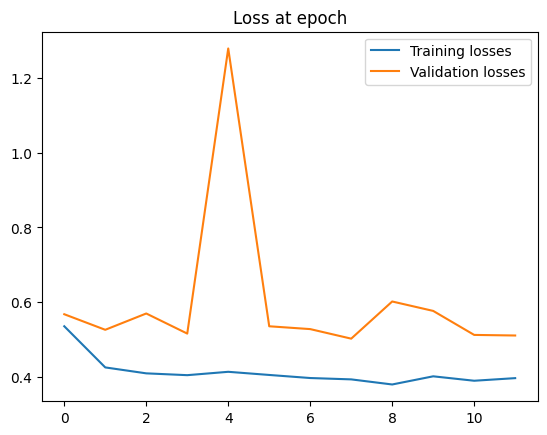

In [ ]:


import matplotlib.pyplot as plt

training_loss_epoch = [tl.item() if isinstance(tl, torch.Tensor) else tl for tl in training_loss_epoch]
testing_loss_epoch = [ts.cpu().item() if isinstance(ts, torch.Tensor) else ts for ts in valid_loss_epoch]
plt.plot(training_loss_epoch, label = "Training losses")
plt.plot(testing_loss_epoch, label = 'Validation losses')
plt.title("Loss at epoch")
plt.legend()


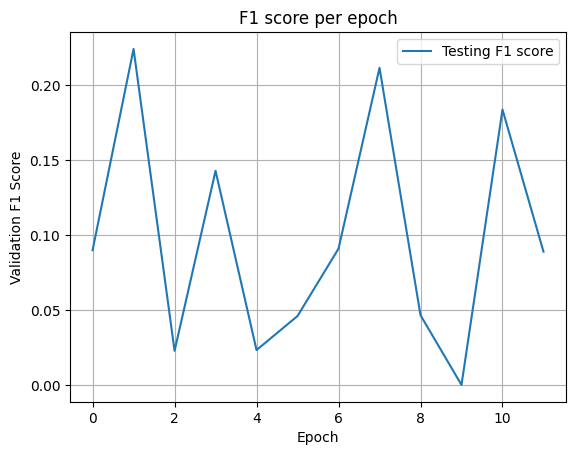

In [ ]:
f1_score_graph = [tl.item() if isinstance(tl, torch.Tensor) else tl for tl in valid_f1_epoch]
plt.plot(valid_f1_epoch, label = "Testing F1 score")
plt.title("F1 score per epoch")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Validation F1 Score")
plt.grid(True)
plt.show()

In [ ]:

  print(per_label_f1_epochs[11])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.53333333 0.         0.
 0.         0.         0.         0.         0.         0.        ]
